In [1]:
%matplotlib inline
import operator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
bytes_dict = {}
with open('lifetime_model.txt', 'r') as f:
    first_line = True
    for line in f:
        line = line.rstrip('\n')
        if first_line:
            first_line = False
        else:
            nbdatasets, nbfiles, bytes, date, time = line.split()
            bytes_dict[datetime.strptime(date, '%Y-%m-%d')] = int(bytes)
dates = bytes_dict.keys()
dates.sort()

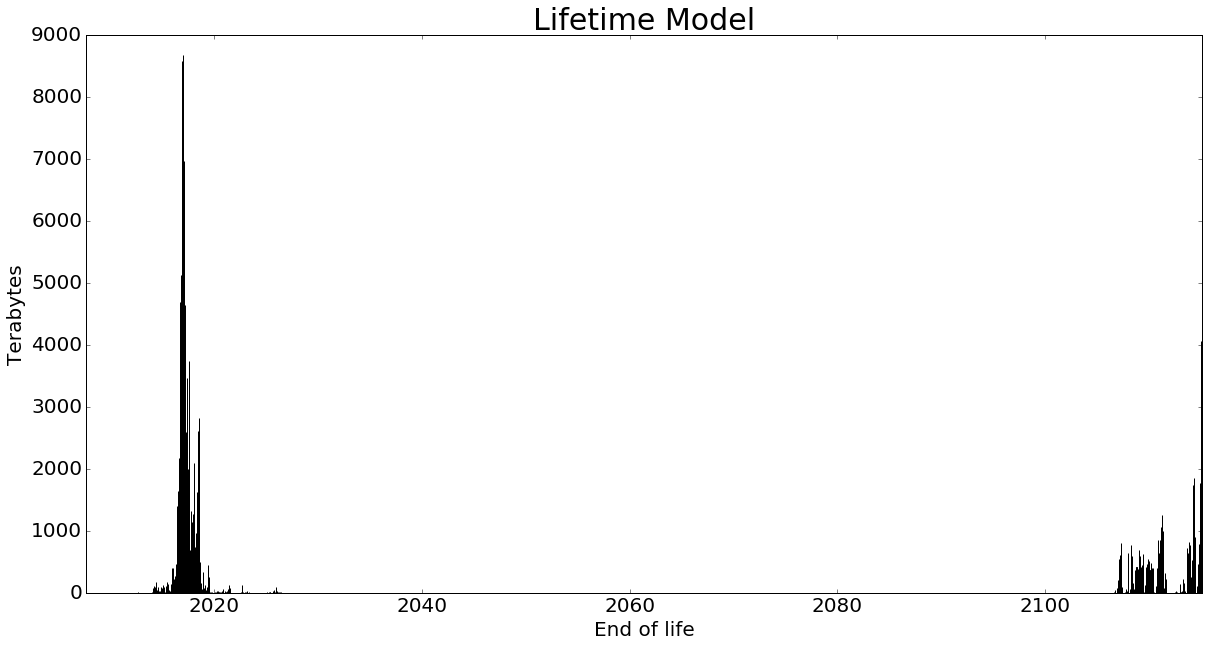

In [2]:
bytes = []
for date in dates:
    bytes.append(bytes_dict[date]/1000**4)
plt.figure(figsize=(20,10))
plt.ylabel('Terabytes', size=20)
plt.xlabel('End of life', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.bar(dates, bytes)
plt.title('Lifetime Model', size=30)

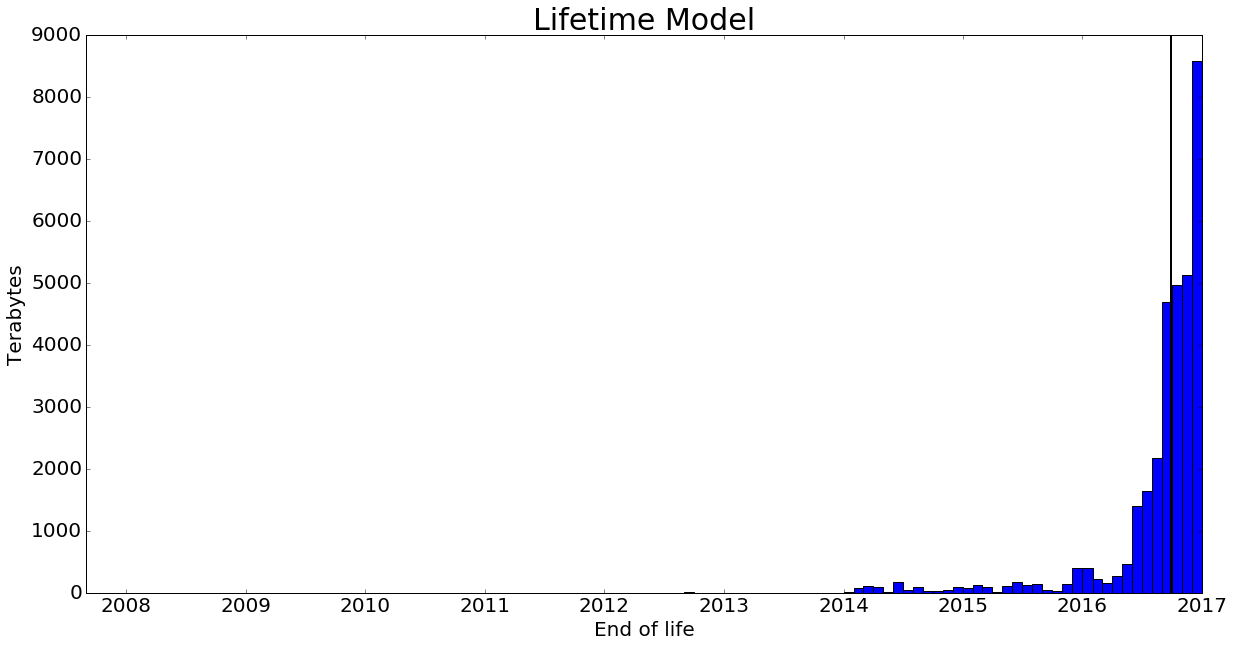

In [3]:
plt.figure(figsize=(20,10))
plt.xlim(datetime(2007, 9, 1, 0, 0), datetime(2017, 1, 1, 0, 0))
plt.ylabel('Terabytes', size=20)
plt.xlabel('End of life', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.bar(dates, bytes, width=[(dates[j+1]-dates[j]).days for j in range(len(dates)-1)] + [30])
plt.plot([datetime(2016, 9, 28, 0, 0), datetime(2016, 9, 28, 0, 0)], [0, 9000], color='k', linestyle='-', linewidth=2)
plt.title('Lifetime Model', size=30)

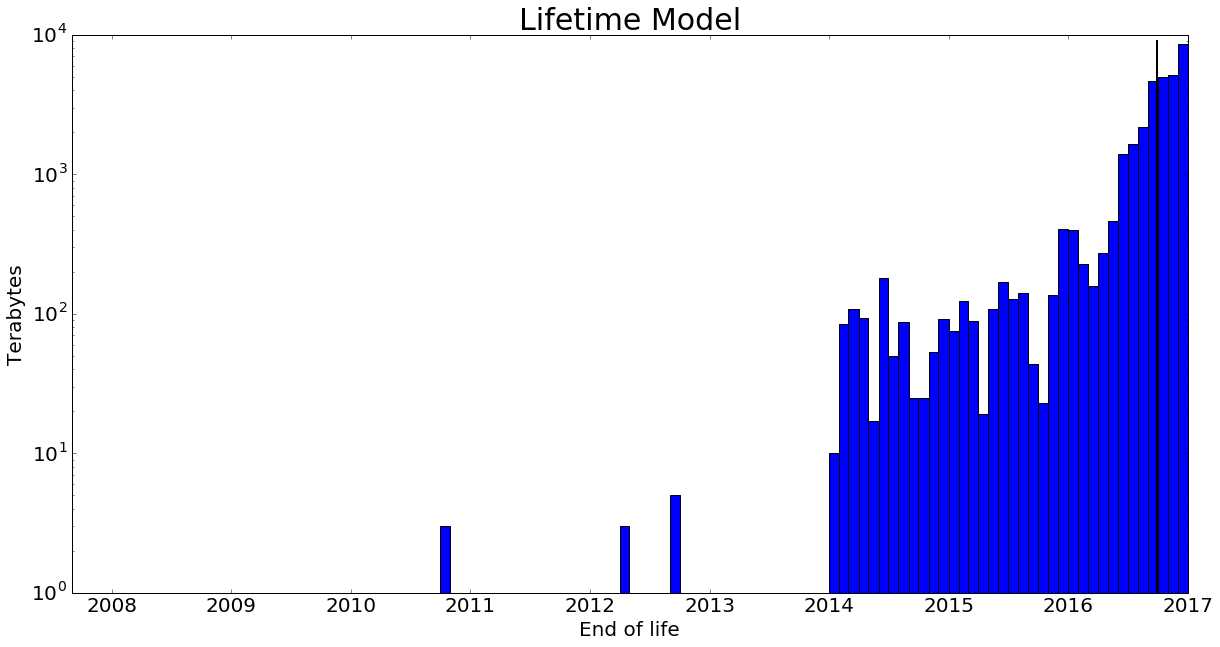

In [4]:
plt.figure(figsize=(20,10))
plt.xlim(datetime(2007, 9, 1, 0, 0), datetime(2017, 1, 1, 0, 0))
plt.ylabel('Terabytes', size=20)
plt.xlabel('End of life', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.yscale('log') 
plt.bar(dates, bytes, width=[(dates[j+1]-dates[j]).days for j in range(len(dates)-1)] + [30])
plt.plot([datetime(2016, 9, 28, 0, 0), datetime(2016, 9, 28, 0, 0)], [0, 9000], color='k', linestyle='-', linewidth=2)
plt.title('Lifetime Model', size=30)

In [27]:
x, y = [], []
nb_rses = 10
first_row = True
colors = []
with open('lifetime_model2.txt', 'r') as f:
    for line in f:
        line = line.strip('\n')
        if first_row:
            first_row = False
        else:
            count, length, bytes, rse = line.split()
            if len(x) < nb_rses:
                x.append(rse)
                y.append(int(bytes))
                colors.append(cm.brg(len(x)/float(nb_rses), 1))
            else:
                x[nb_rses - 1] = 'other'
                y[nb_rses - 1] += int(bytes)
                colors[nb_rses - 1] = cm.brg(1., 1)
#print x, y

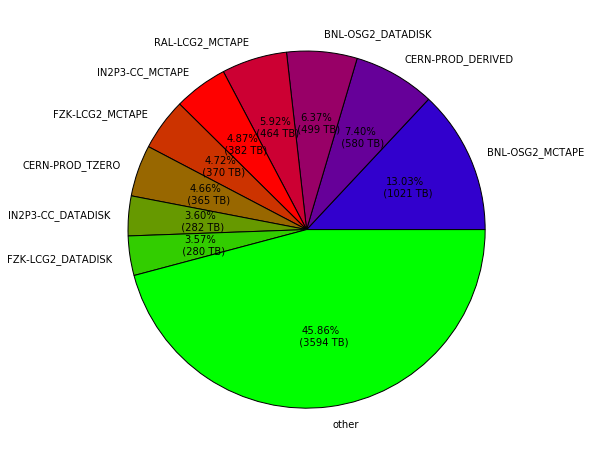

In [33]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n  ({v:d} TB)'.format(p=pct,v=val)
    return my_autopct

TBs = [_/1000**4 for _ in y]
#plt.figure(figsize=plt.figaspect(1))
plt.figure(figsize=(8, 8))
plt.pie(TBs, labels=x, colors=colors, autopct=make_autopct(TBs))
plt.savefig('plot2.pdf')
plt.show()
#plt.legend()

In [13]:
x, scopes, sum_scope = [], {}, {}
nb_rses = 5
first_row = True
colors = []
with open('lifetime_model3.txt', 'r') as f:
    for line in f:
        line = line.strip('\n')
        if first_row:
            first_row = False
        else:
            count, length, bytes, scope, date, time = line.split()
            date = datetime.strptime(date, '%Y-%m-%d')
            if date < datetime(2017, 1, 1, 0, 0):
                if scope not in sum_scope:
                    sum_scope[scope] = 0
                if date not in scopes:
                    scopes[date] = {}
                scopes[date][scope] = int(bytes)
                sum_scope[scope] += int(bytes)
                if date not in x:
                    x.append(date)
x.sort()
sorted_scopes = sorted(sum_scope.items(), key=operator.itemgetter(1))
sorted_scopes.reverse()

In [14]:
max_scope = 5
dict_scope = {}
for i in sorted_scopes[:max_scope]:
    dict_scope[i[0]] = {}
dict_scope['other'] = {}

for date in x:
    for scope in scopes[date]:
        if scope in dict_scope:
            dict_scope[scope][date] = scopes[date][scope]
        else:
            if date not in dict_scope['other']:
                dict_scope['other'][date] = 0
            dict_scope['other'][date] += scopes[date][scope]

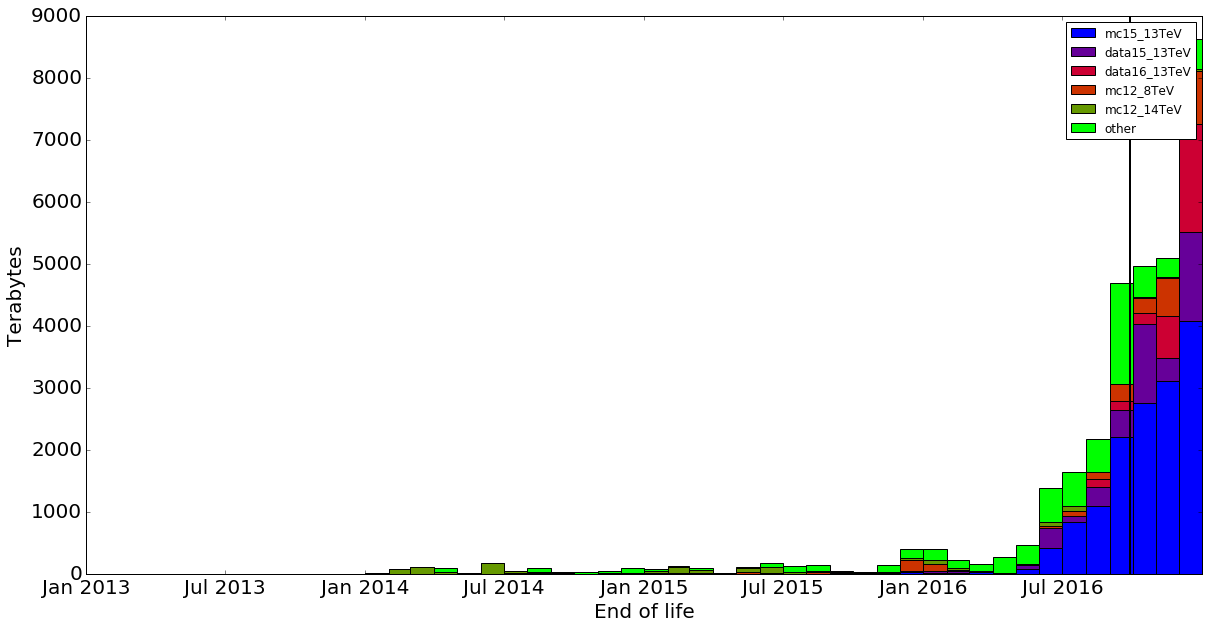

In [24]:
now = datetime(2016, 10, 19, 0, 0)
plt.figure(figsize=(20,10))
i = 0
width= [(x[j+1]-x[j]).days for j in range(len(x)-1)] + [30]
bottom = [0 for date in x]
for scope, value in sorted_scopes[:max_scope] + [('other', 0)]:
    y_values = []
    for date in x:
        if date in dict_scope[scope]:
            y_values.append(dict_scope[scope][date]/1000**4)
        else:
            y_values.append(0)           
    color = cm.brg(i/float(max_scope or 1), 1)
    i += 1
    plt.bar(x, y_values, color=color, bottom=bottom, width=width, label=scope)
    bottom =[y_values[j] + bottom[j] for j in range(len(bottom))]
plt.ylabel('Terabytes', size=20)
plt.xlabel('End of life', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot([now, now, [0, 9000], color='k', linestyle='-', linewidth=2)
#plt.title('Lifetime Model', size=30)
plt.legend()
plt.xlim(xmin = datetime(2013, 1, 1))
plt.savefig('plot3.pdf')

Datasets that will expire in September

In [34]:
x, scopes, sum_scope = [], {}, {}
nb_rses = 5
first_row = True
colors = []
with open('lifetime_model4.txt', 'r') as f:
    for line in f:
        line = line.strip('\n')
        if first_row:
            first_row = False
        else:
            scope, name, rse, nbfiles, nbbytes, date, time = line.split()
            date = datetime.strptime(date, '%Y-%m-%d')
            sname = name.split('.')
            scope, datatype = sname[0], sname[4]
            datatype = datatype.split('_')[0]
            cat = '%s:%s' % (scope, datatype) 
            if cat not in sum_scope:
                sum_scope[cat] = 0
            if cat not in scopes:
                scopes[date] = {}
            scopes[date][cat] = int(nbbytes)
            sum_scope[cat] += int(nbbytes)
            if date not in x:
                x.append(date)
x.sort()
sorted_scopes = sorted(sum_scope.items(), key=operator.itemgetter(1))
sorted_scopes.reverse()

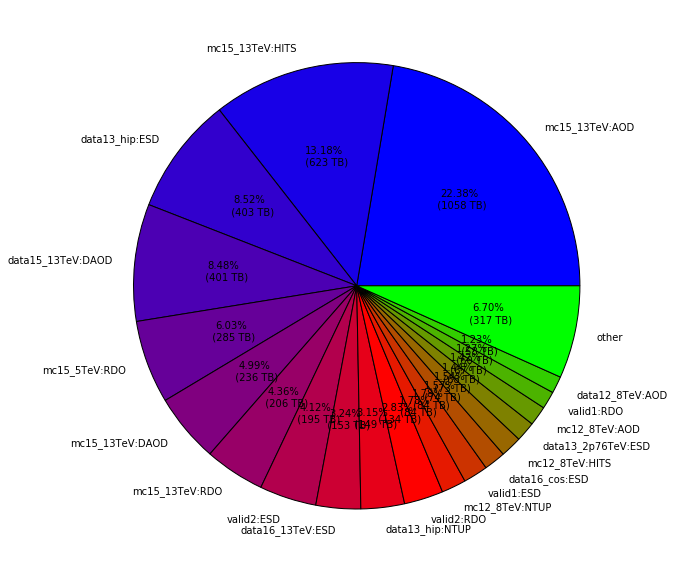

In [36]:
x, y = [], []
nb_cat = 20
colors = []
i = 0
for i in range(len(sorted_scopes)):
    cat, nbbytes = sorted_scopes[i]
    if i < nb_cat:
        x.append(cat)
        y.append(int(nbbytes))
        #colors.append(cm.rainbow(i/float(nb_cat), 1))
        colors.append(cm.brg(i/float(nb_cat), 1))
    else:
        x[nb_cat - 1] = 'other'
        y[nb_cat - 1] += int(nbbytes)
colors[nb_cat - 1] = cm.brg(1., 1)
TBs = [_/1000**4 for _ in y]
#plt.figure(figsize=plt.figaspect(1))
plt.figure(figsize=(10,10))
plt.pie(TBs, labels=x, colors=colors, autopct=make_autopct(TBs))
plt.savefig('plot4.pdf')
plt.show()
#plt.legend()